In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler

from scipy import stats

import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [2]:
popularity_df = pd.read_csv("../Data/trends.csv")
performance_df = pd.read_csv("../Data/financial_performance.csv")
blogs_sentiment_df = pd.read_csv("../Sentiments/blogs_company_sentiment.csv")
news_sentiment_df = pd.read_csv("../Sentiments/news_company_sentiment.csv")
reviews_sentiment_df = pd.read_csv("../Sentiments/reviews_company_sentiment.csv")
tweets_sentiment_df = pd.read_csv("../Sentiments/tweets_company_sentiment.csv")

In [3]:
reviews_stars_df = reviews_sentiment_df[['Company', 'stars']]
reviews_sentiment_df = reviews_sentiment_df.drop(['stars'], axis=1)

In [4]:
blogs_sentiment_df.columns = ["Company", "Blog_VADER", "Blog_TextBlob", "Blog_GoogleAPI"]

blogs_sentiment_df["Blog_VADER_TextBlob"] = (blogs_sentiment_df["Blog_VADER"] + 
                                             blogs_sentiment_df["Blog_TextBlob"]) / 2
blogs_sentiment_df["Blog_VADER_GoogleAPI"] = (blogs_sentiment_df["Blog_VADER"] + 
                                              blogs_sentiment_df["Blog_GoogleAPI"]) / 2
blogs_sentiment_df["Blog_TextBlob_GoogleAPI"] = (blogs_sentiment_df["Blog_TextBlob"] + 
                                                 blogs_sentiment_df["Blog_GoogleAPI"]) / 2
blogs_sentiment_df["Blog_VADER_TextBlob_GoogleAPI"] = (blogs_sentiment_df["Blog_VADER"] + 
                                                       blogs_sentiment_df["Blog_TextBlob"] +
                                                       blogs_sentiment_df["Blog_GoogleAPI"]) / 3

In [5]:
news_sentiment_df.columns = ["Company", "News_VADER", "News_TextBlob", "News_GoogleAPI"]

news_sentiment_df["News_VADER_TextBlob"] = (news_sentiment_df["News_VADER"] + 
                                            news_sentiment_df["News_TextBlob"]) / 2
news_sentiment_df["News_VADER_GoogleAPI"] = (news_sentiment_df["News_VADER"] + 
                                             news_sentiment_df["News_GoogleAPI"]) / 2
news_sentiment_df["News_TextBlob_GoogleAPI"] = (news_sentiment_df["News_TextBlob"] + 
                                                news_sentiment_df["News_GoogleAPI"]) / 2
news_sentiment_df["News_VADER_TextBlob_GoogleAPI"] = (news_sentiment_df["News_VADER"] + 
                                                      news_sentiment_df["News_TextBlob"] +
                                                      news_sentiment_df["News_GoogleAPI"]) / 3

In [6]:
reviews_sentiment_df.columns = ["Company", "Review_VADER", "Review_TextBlob", "Review_GoogleAPI"]

reviews_sentiment_df["Review_VADER_TextBlob"] = (reviews_sentiment_df["Review_VADER"] + 
                                                 reviews_sentiment_df["Review_TextBlob"]) / 2
reviews_sentiment_df["Review_VADER_GoogleAPI"] = (reviews_sentiment_df["Review_VADER"] + 
                                                  reviews_sentiment_df["Review_GoogleAPI"]) / 2
reviews_sentiment_df["Review_TextBlob_GoogleAPI"] = (reviews_sentiment_df["Review_TextBlob"] + 
                                                     reviews_sentiment_df["Review_GoogleAPI"]) / 2
reviews_sentiment_df["Review_VADER_TextBlob_GoogleAPI"] = (reviews_sentiment_df["Review_VADER"] + 
                                                           reviews_sentiment_df["Review_TextBlob"] +
                                                           reviews_sentiment_df["Review_GoogleAPI"]) / 3

In [7]:
reviews_stars_df.columns = ["Company", "Review_Stars"]

# since the average stars scale from approximately 1.9 to 4.6 (normal scale 1 to 5), I
# relatively scaled the average stars into a scale of -1 to 1 to compare with sentiment scores
# (normal scale -1 to 1).
# this will contain the information of the star ratings as the 1.9 is close to the minimum
# and 4.6 is close to the maximum.
scaler = MinMaxScaler((-1, 1))

stars = np.array(reviews_stars_df['Review_Stars']).reshape(-1, 1)
stars_scaled = scaler.fit_transform(stars)
reviews_stars_df['Review_Stars'] = stars_scaled

In [8]:
tweets_sentiment_df.columns = ["Company", "Tweet_VADER", "Tweet_TextBlob", "Tweet_GoogleAPI"]

tweets_sentiment_df["Tweet_VADER_TextBlob"] = (tweets_sentiment_df["Tweet_VADER"] + 
                                               tweets_sentiment_df["Tweet_TextBlob"]) / 2
tweets_sentiment_df["Tweet_VADER_GoogleAPI"] = (tweets_sentiment_df["Tweet_VADER"] + 
                                                tweets_sentiment_df["Tweet_GoogleAPI"]) / 2
tweets_sentiment_df["Tweet_TextBlob_GoogleAPI"] = (tweets_sentiment_df["Tweet_TextBlob"] + 
                                                   tweets_sentiment_df["Tweet_GoogleAPI"]) / 2
tweets_sentiment_df["Tweet_VADER_TextBlob_GoogleAPI"] = (tweets_sentiment_df["Tweet_VADER"] + 
                                                         tweets_sentiment_df["Tweet_TextBlob"] +
                                                         tweets_sentiment_df["Tweet_GoogleAPI"]) / 3

In [9]:
data_df = pd.merge(blogs_sentiment_df, news_sentiment_df, on="Company")
data_df = pd.merge(data_df, reviews_sentiment_df, on="Company")
data_df = pd.merge(data_df, reviews_stars_df, on="Company")
data_df = pd.merge(data_df, tweets_sentiment_df, on="Company")

In [10]:
data_df["VADER"] = (data_df["Blog_VADER"] + data_df["News_VADER"] + data_df["Review_VADER"] + data_df["Tweet_VADER"]) / 4
data_df["TextBlob"] = (data_df["Blog_TextBlob"] + data_df["News_TextBlob"] + data_df["Review_TextBlob"] + data_df["Tweet_TextBlob"]) / 4
data_df["GoogleAPI"] = (data_df["Blog_GoogleAPI"] + data_df["News_GoogleAPI"] + data_df["Review_GoogleAPI"] + data_df["Tweet_GoogleAPI"]) / 4
data_df["VADER_TextBlob"] = (data_df["Blog_VADER_TextBlob"] + data_df["News_VADER_TextBlob"] + data_df["Review_VADER_TextBlob"] + data_df["Tweet_VADER_TextBlob"]) / 4
data_df["VADER_GoogleAPI"] = (data_df["Blog_VADER_GoogleAPI"] + data_df["News_VADER_GoogleAPI"] + data_df["Review_VADER_GoogleAPI"] + data_df["Tweet_VADER_GoogleAPI"]) / 4
data_df["TextBlob_GoogleAPI"] = (data_df["Blog_TextBlob_GoogleAPI"] + data_df["News_TextBlob_GoogleAPI"] + data_df["Review_TextBlob_GoogleAPI"] + data_df["Tweet_TextBlob_GoogleAPI"]) / 4
data_df["VADER_TextBlob_GoogleAPI"] = (data_df["Blog_VADER_TextBlob_GoogleAPI"] + data_df["News_VADER_TextBlob_GoogleAPI"] + data_df["Review_VADER_TextBlob_GoogleAPI"] + data_df["Tweet_VADER_TextBlob_GoogleAPI"]) / 4

In [11]:
tests_df1 = pd.merge(popularity_df, performance_df, on="Company")
tests_df1 = pd.merge(tests_df1, data_df[["Company","VADER", "TextBlob", "GoogleAPI", "VADER_TextBlob", "VADER_GoogleAPI", "TextBlob_GoogleAPI", "VADER_TextBlob_GoogleAPI", "Review_Stars"]],on="Company")

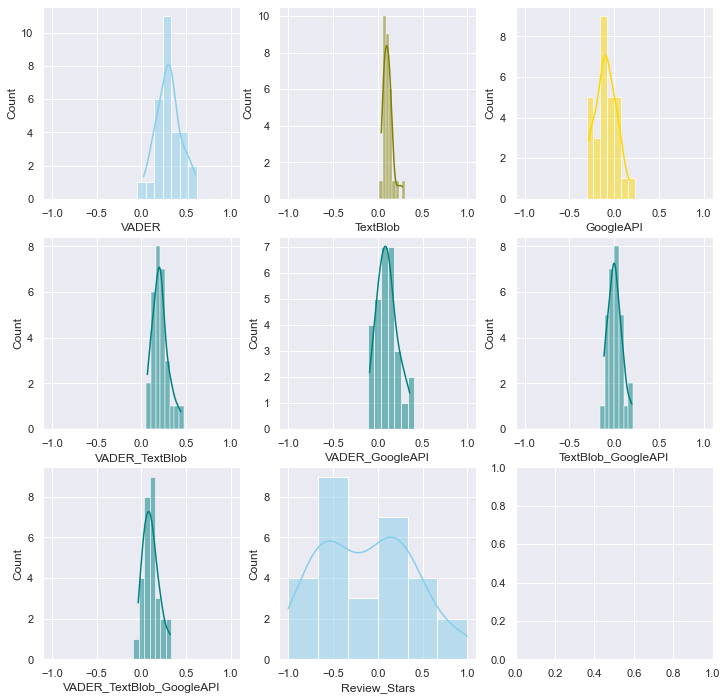

In [12]:
sns.set(style="darkgrid")

fig, axs = plt.subplots(3, 3, figsize=(12, 12))

sns.histplot(data=tests_df1, x="VADER", kde=True, color="skyblue", binrange = (-1, 1), ax=axs[0, 0])
sns.histplot(data=tests_df1, x="TextBlob", kde=True, color="olive", binrange = (-1, 1), ax=axs[0, 1])
sns.histplot(data=tests_df1, x="GoogleAPI", kde=True, color="gold", binrange = (-1, 1), ax=axs[0, 2])
sns.histplot(data=tests_df1, x="VADER_TextBlob", kde=True, color="teal", binrange = (-1, 1), ax=axs[1, 0])
sns.histplot(data=tests_df1, x="VADER_GoogleAPI", kde=True, color="teal", binrange = (-1, 1), ax=axs[1, 1])
sns.histplot(data=tests_df1, x="TextBlob_GoogleAPI", kde=True, color="teal", binrange = (-1, 1), ax=axs[1, 2])
sns.histplot(data=tests_df1, x="VADER_TextBlob_GoogleAPI", kde=True, color="teal", binrange = (-1, 1), ax=axs[2, 0])
sns.histplot(data=tests_df1, x="Review_Stars", kde=True, color="skyblue", binrange = (-1, 1), ax=axs[2, 1])

plt.show()

In [13]:
compare = ["Popularity", "Revenue Growth", "Profit Growth"]
data = tests_df1.columns[4:]
result_df = pd.DataFrame(columns=['Algorithm', 'Metric', 'Correlation Method','Correlation','P-value'])

for i in compare:
    for j in data:
        if j == "Review_Stars":
            result = stats.spearmanr(tests_df1[i], tests_df1[j])
            result_df = result_df.append({'Algorithm':j, 'Metric':i, 'Correlation Method':'Spearman','Correlation':result[0],'P-value':result[1]}, ignore_index=True)
        else:
            result = stats.pearsonr(tests_df1[i], tests_df1[j])
            result_df = result_df.append({'Algorithm':j, 'Metric':i, 'Correlation Method':'Pearson','Correlation':result[0],'P-value':result[1]}, ignore_index=True)

In [14]:
result_df

,Algorithm,Metric,Correlation Method,Correlation,P-value
0,VADER,Popularity,Pearson,0.062536,0.747248
1,TextBlob,Popularity,Pearson,0.130708,0.499150
2,GoogleAPI,Popularity,Pearson,0.054575,0.778575
3,VADER_TextBlob,Popularity,Pearson,0.086241,0.656447
4,VADER_GoogleAPI,Popularity,Pearson,0.064572,0.739299
5,TextBlob_GoogleAPI,Popularity,Pearson,0.081434,0.674526
6,VADER_TextBlob_GoogleAPI,Popularity,Pearson,0.078690,0.684926
7,Review_Stars,Popularity,Spearman,0.030705,0.874366
8,VADER,Revenue Growth,Pearson,0.202327,0.292536
9,TextBlob,Revenue Growth,Pearson,0.124694,0.519262


In [15]:
data_df["BN_VADER"] = (data_df["Blog_VADER"] + data_df["News_VADER"]) / 2
data_df["BR_VADER"] = (data_df["Blog_VADER"] + data_df["Review_VADER"]) / 2
data_df["BT_VADER"] = (data_df["Blog_VADER"] + data_df["Tweet_VADER"]) / 2
data_df["NR_VADER"] = (data_df["News_VADER"] + data_df["Review_VADER"]) / 2
data_df["NT_VADER"] = (data_df["News_VADER"] + data_df["Tweet_VADER"]) / 2
data_df["RT_VADER"] = (data_df["Review_VADER"] + data_df["Tweet_VADER"]) / 2
data_df["BNR_VADER"] = (data_df["Blog_VADER"] + data_df["News_VADER"] + data_df["Review_VADER"]) / 3
data_df["BNT_VADER"] = (data_df["Blog_VADER"] + data_df["News_VADER"] + data_df["Tweet_VADER"]) / 3
data_df["BRT_VADER"] = (data_df["Blog_VADER"] + data_df["Review_VADER"] + data_df["Tweet_VADER"]) / 3
data_df["NRT_VADER"] = (data_df["News_VADER"] + data_df["Review_VADER"] + data_df["Tweet_VADER"]) / 3

In [16]:
tests_df2 = pd.merge(popularity_df, performance_df, on="Company")
tests_df2 = pd.merge(tests_df2, data_df[["Company", "Blog_VADER", "News_VADER", "Review_VADER" ,"Tweet_VADER", "BN_VADER", "BR_VADER", "BT_VADER", "NR_VADER", "NT_VADER", "RT_VADER", "BNR_VADER", "BNT_VADER", "BRT_VADER", "NRT_VADER", "VADER"]],on="Company")

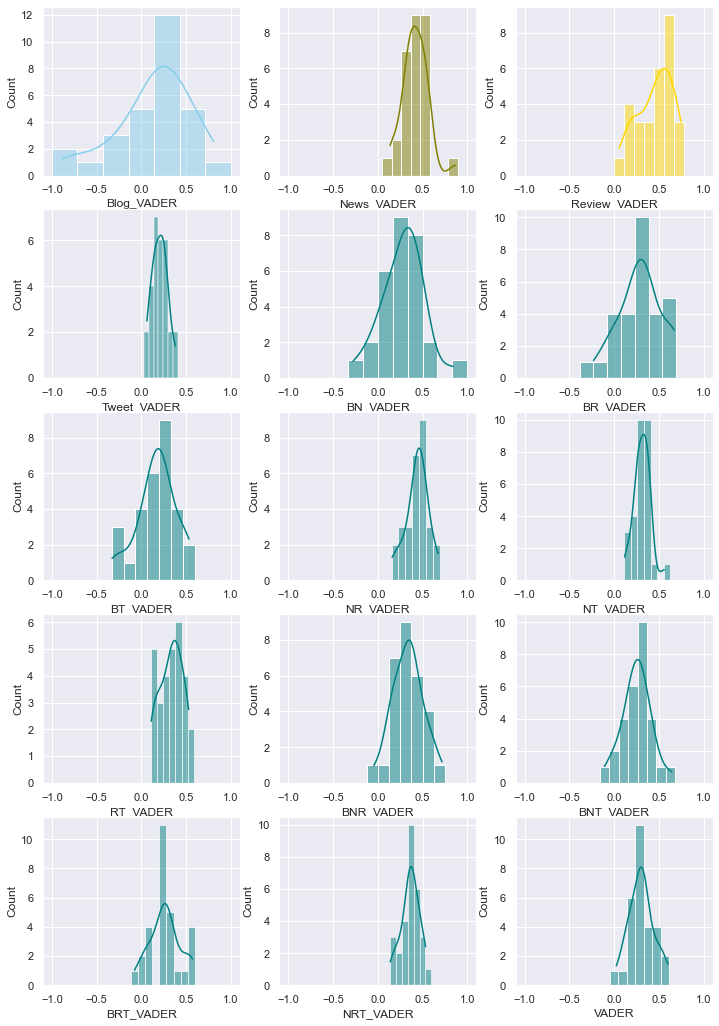

In [17]:
sns.set(style="darkgrid")

fig, axs = plt.subplots(5, 3, figsize=(12, 18))

sns.histplot(data=tests_df2, x="Blog_VADER", kde=True, color="skyblue", binrange = (-1, 1), ax=axs[0, 0])
sns.histplot(data=tests_df2, x="News_VADER", kde=True, color="olive", binrange = (-1, 1), ax=axs[0, 1])
sns.histplot(data=tests_df2, x="Review_VADER", kde=True, color="gold", binrange = (-1, 1), ax=axs[0, 2])
sns.histplot(data=tests_df2, x="Tweet_VADER", kde=True, color="teal", binrange = (-1, 1), ax=axs[1, 0])
sns.histplot(data=tests_df2, x="BN_VADER", kde=True, color="teal", binrange = (-1, 1), ax=axs[1, 1])
sns.histplot(data=tests_df2, x="BR_VADER", kde=True, color="teal", binrange = (-1, 1), ax=axs[1, 2])
sns.histplot(data=tests_df2, x="BT_VADER", kde=True, color="teal", binrange = (-1, 1), ax=axs[2, 0])
sns.histplot(data=tests_df2, x="NR_VADER", kde=True, color="teal", binrange = (-1, 1), ax=axs[2, 1])
sns.histplot(data=tests_df2, x="NT_VADER", kde=True, color="teal", binrange = (-1, 1), ax=axs[2, 2])
sns.histplot(data=tests_df2, x="RT_VADER", kde=True, color="teal", binrange = (-1, 1), ax=axs[3, 0])
sns.histplot(data=tests_df2, x="BNR_VADER", kde=True, color="teal", binrange = (-1, 1), ax=axs[3, 1])
sns.histplot(data=tests_df2, x="BNT_VADER", kde=True, color="teal", binrange = (-1, 1), ax=axs[3, 2])
sns.histplot(data=tests_df2, x="BRT_VADER", kde=True, color="teal", binrange = (-1, 1), ax=axs[4, 0])
sns.histplot(data=tests_df2, x="NRT_VADER", kde=True, color="teal", binrange = (-1, 1), ax=axs[4, 1])
sns.histplot(data=tests_df2, x="VADER", kde=True, color="teal", binrange = (-1, 1), ax=axs[4, 2])

plt.show()

In [18]:
compare = ["Revenue Growth", "Profit Growth"]
data = tests_df2.columns[4:]
result_df2 = pd.DataFrame(columns=['Algorithm', 'Metric', 'Correlation Method','Correlation','P-value'])

for i in compare:
    for j in data:
        result = stats.pearsonr(tests_df2[i], tests_df2[j])
        result_df2 = result_df2.append({'Algorithm':j, 'Metric':i, 'Correlation Method':'Pearson','Correlation':result[0],'P-value':result[1]}, ignore_index=True)

In [19]:
result_df2

,Algorithm,Metric,Correlation Method,Correlation,P-value
0,Blog_VADER,Revenue Growth,Pearson,0.289066,0.128292
1,News_VADER,Revenue Growth,Pearson,0.115057,0.552294
2,Review_VADER,Revenue Growth,Pearson,-0.176615,0.359405
3,Tweet_VADER,Revenue Growth,Pearson,0.082795,0.669389
4,BN_VADER,Revenue Growth,Pearson,0.300574,0.113119
5,BR_VADER,Revenue Growth,Pearson,0.183488,0.340705
6,BT_VADER,Revenue Growth,Pearson,0.295089,0.120174
7,NR_VADER,Revenue Growth,Pearson,-0.070987,0.714423
8,NT_VADER,Revenue Growth,Pearson,0.131920,0.495141
9,RT_VADER,Revenue Growth,Pearson,-0.108004,0.577071


In [20]:
data_df["BN_TextBlob"] = (data_df["Blog_TextBlob"] + data_df["News_TextBlob"]) / 2
data_df["BR_TextBlob"] = (data_df["Blog_TextBlob"] + data_df["Review_TextBlob"]) / 2
data_df["BT_TextBlob"] = (data_df["Blog_TextBlob"] + data_df["Tweet_TextBlob"]) / 2
data_df["NR_TextBlob"] = (data_df["News_TextBlob"] + data_df["Review_TextBlob"]) / 2
data_df["NT_TextBlob"] = (data_df["News_TextBlob"] + data_df["Tweet_TextBlob"]) / 2
data_df["RT_TextBlob"] = (data_df["Review_TextBlob"] + data_df["Tweet_TextBlob"]) / 2
data_df["BNR_TextBlob"] = (data_df["Blog_TextBlob"] + data_df["News_TextBlob"] + data_df["Review_TextBlob"]) / 3
data_df["BNT_TextBlob"] = (data_df["Blog_TextBlob"] + data_df["News_TextBlob"] + data_df["Tweet_TextBlob"]) / 3
data_df["BRT_TextBlob"] = (data_df["Blog_TextBlob"] + data_df["Review_TextBlob"] + data_df["Tweet_TextBlob"]) / 3
data_df["NRT_TextBlob"] = (data_df["News_TextBlob"] + data_df["Review_TextBlob"] + data_df["Tweet_TextBlob"]) / 3

In [21]:
tests_df3 = pd.merge(popularity_df, performance_df, on="Company")
tests_df3 = pd.merge(tests_df3, data_df[["Company", "Blog_TextBlob", "News_TextBlob", "Review_TextBlob" ,"Tweet_TextBlob", "BN_TextBlob", "BR_TextBlob", "BT_TextBlob", "NR_TextBlob", "NT_TextBlob", "RT_TextBlob", "BNR_TextBlob", "BNT_TextBlob", "BRT_TextBlob", "NRT_TextBlob", "TextBlob"]],on="Company")

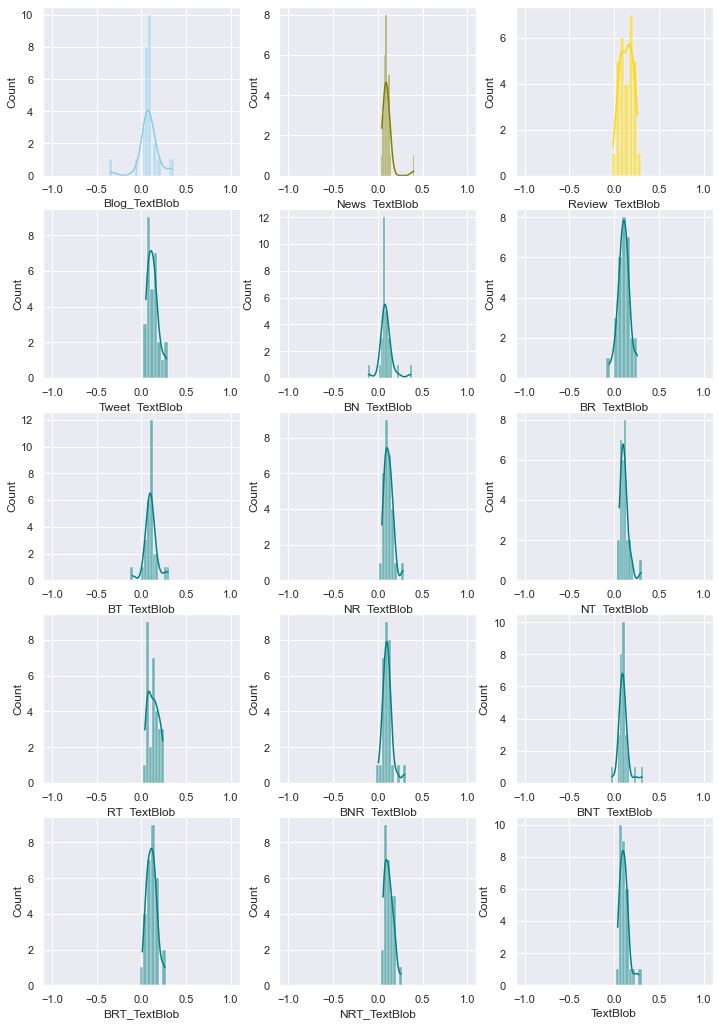

In [22]:
sns.set(style="darkgrid")

fig, axs = plt.subplots(5, 3, figsize=(12, 18))

sns.histplot(data=tests_df3, x="Blog_TextBlob", kde=True, color="skyblue", binrange = (-1, 1), ax=axs[0, 0])
sns.histplot(data=tests_df3, x="News_TextBlob", kde=True, color="olive", binrange = (-1, 1), ax=axs[0, 1])
sns.histplot(data=tests_df3, x="Review_TextBlob", kde=True, color="gold", binrange = (-1, 1), ax=axs[0, 2])
sns.histplot(data=tests_df3, x="Tweet_TextBlob", kde=True, color="teal", binrange = (-1, 1), ax=axs[1, 0])
sns.histplot(data=tests_df3, x="BN_TextBlob", kde=True, color="teal", binrange = (-1, 1), ax=axs[1, 1])
sns.histplot(data=tests_df3, x="BR_TextBlob", kde=True, color="teal", binrange = (-1, 1), ax=axs[1, 2])
sns.histplot(data=tests_df3, x="BT_TextBlob", kde=True, color="teal", binrange = (-1, 1), ax=axs[2, 0])
sns.histplot(data=tests_df3, x="NR_TextBlob", kde=True, color="teal", binrange = (-1, 1), ax=axs[2, 1])
sns.histplot(data=tests_df3, x="NT_TextBlob", kde=True, color="teal", binrange = (-1, 1), ax=axs[2, 2])
sns.histplot(data=tests_df3, x="RT_TextBlob", kde=True, color="teal", binrange = (-1, 1), ax=axs[3, 0])
sns.histplot(data=tests_df3, x="BNR_TextBlob", kde=True, color="teal", binrange = (-1, 1), ax=axs[3, 1])
sns.histplot(data=tests_df3, x="BNT_TextBlob", kde=True, color="teal", binrange = (-1, 1), ax=axs[3, 2])
sns.histplot(data=tests_df3, x="BRT_TextBlob", kde=True, color="teal", binrange = (-1, 1), ax=axs[4, 0])
sns.histplot(data=tests_df3, x="NRT_TextBlob", kde=True, color="teal", binrange = (-1, 1), ax=axs[4, 1])
sns.histplot(data=tests_df3, x="TextBlob", kde=True, color="teal", binrange = (-1, 1), ax=axs[4, 2])

plt.show()

In [23]:
compare = ["Popularity"]
data = tests_df3.columns[4:]
result_df3 = pd.DataFrame(columns=['Algorithm', 'Metric', 'Correlation Method','Correlation','P-value'])

for i in compare:
    for j in data:
        result = stats.pearsonr(tests_df3[i], tests_df3[j])
        result_df3 = result_df3.append({'Algorithm':j, 'Metric':i, 'Correlation Method':'Pearson','Correlation':result[0],'P-value':result[1]}, ignore_index=True)

In [24]:
result_df3

,Algorithm,Metric,Correlation Method,Correlation,P-value
0,Blog_TextBlob,Popularity,Pearson,0.191469,0.319744
1,News_TextBlob,Popularity,Pearson,0.100638,0.603459
2,Review_TextBlob,Popularity,Pearson,-0.017870,0.926693
3,Tweet_TextBlob,Popularity,Pearson,-0.004906,0.979849
4,BN_TextBlob,Popularity,Pearson,0.190971,0.321029
5,BR_TextBlob,Popularity,Pearson,0.157324,0.415047
6,BT_TextBlob,Popularity,Pearson,0.153632,0.426218
7,NR_TextBlob,Popularity,Pearson,0.050008,0.796703
8,NT_TextBlob,Popularity,Pearson,0.060189,0.756446
9,RT_TextBlob,Popularity,Pearson,-0.013144,0.946046


In [25]:
tests_df4 = pd.merge(popularity_df, performance_df, on="Company")
tests_df4 = pd.merge(tests_df4, data_df[data_df.columns[:30]],on="Company")

In [26]:
y1 = np.array(tests_df4["Popularity"])
y2 = np.array(tests_df4["Revenue Growth"])
y3 = np.array(tests_df4["Profit Growth"])
y = [[y1, 'Popularity'], [y2, 'Revenue Growth'], [y3, 'Profit Growth']]

x1 = np.array(tests_df4[["Blog_VADER", "News_VADER", "Review_VADER", "Tweet_VADER"]])
x2 = np.array(tests_df4[["Blog_TextBlob", "News_TextBlob", "Review_TextBlob", "Tweet_TextBlob"]])
x3 = np.array(tests_df4[["Blog_GoogleAPI", "News_GoogleAPI", "Review_GoogleAPI", "Tweet_GoogleAPI"]])
x4 = np.array(tests_df4[["Blog_VADER_TextBlob", "News_VADER_TextBlob", "Review_VADER_TextBlob", "Tweet_VADER_TextBlob"]])
x5 = np.array(tests_df4[["Blog_VADER_GoogleAPI", "News_VADER_GoogleAPI", "Review_VADER_GoogleAPI", "Tweet_VADER_GoogleAPI"]])
x6 = np.array(tests_df4[["Blog_TextBlob_GoogleAPI", "News_TextBlob_GoogleAPI", "Review_TextBlob_GoogleAPI", "Tweet_TextBlob_GoogleAPI"]])
x7 = np.array(tests_df4[["Blog_VADER_TextBlob_GoogleAPI", "News_VADER_TextBlob_GoogleAPI", "Review_VADER_TextBlob_GoogleAPI", "Tweet_VADER_TextBlob_GoogleAPI"]])
x = [[x1, "VADER"], [x2, "TextBlob"], [x3, "GoogleAPI"], [x4, "VADER_TextBlob"], [x5, "VADER_GoogleAPI"], [x6, "TextBlob_GoogleAPI"], [x7, "VADER_TextBlob_GoogleAPI"]]

result_df4 = pd.DataFrame(columns=['Metric', 'Algorithm', 'Coefficients_1', 'Coefficients_2', 'Coefficients_3', 'Coefficients_4', 'Intercept', 'R-squared'])

In [27]:
for i in range(len(y)):
    for j in range(len(x)):
        model = LinearRegression().fit(x[j][0], y[i][0])
        predictions = model.predict(x[j][0])
        rsq = r2_score(y[i][0], predictions)
        result_df4 = result_df4.append({'Metric':y[i][1], 'Algorithm':x[j][1], 'Coefficients_1':model.coef_[0], 'Coefficients_2':model.coef_[1], 'Coefficients_3':model.coef_[2], 'Coefficients_4':model.coef_[3], 'Intercept':model.intercept_, 'R-squared':rsq}, ignore_index=True)

In [28]:
result_df4

,Metric,Algorithm,Coefficients_1,Coefficients_2,Coefficients_3,Coefficients_4,Intercept,R-squared
0,Popularity,VADER,4.782414,-3.049429,-1.215380,-13.592469,14.751868,0.031155
1,Popularity,TextBlob,22.940080,13.269045,11.705868,-24.573296,9.025641,0.044024
2,Popularity,GoogleAPI,30.456155,-29.376375,4.050239,-5.374802,17.769775,0.189167
3,Popularity,VADER_TextBlob,9.621692,-1.329914,-1.060985,-13.735002,12.675843,0.033847
4,Popularity,VADER_GoogleAPI,12.138603,-12.675155,-1.830976,-4.056277,14.812047,0.071497
5,Popularity,TextBlob_GoogleAPI,38.046872,-28.709035,8.903879,-14.554812,16.105303,0.137853
6,Popularity,VADER_TextBlob_GoogleAPI,16.603908,-12.951892,-0.463057,-7.786412,14.244795,0.069539
7,Revenue Growth,VADER,0.167427,0.110472,-0.434470,0.722613,-0.107714,0.169418
8,Revenue Growth,TextBlob,0.451678,0.017622,-0.692116,0.449564,-0.092092,0.084600
9,Revenue Growth,GoogleAPI,0.228692,-0.108279,-0.239982,0.288660,-0.057248,0.076686
